<center>
    <img src= 'https://1000logos.net/wp-content/uploads/2018/07/Tinder-logo.png' 
         width=300 height=300 >
    
# Tinder comments analysis within time range    

The following will conduct a text analysis on data from the Tinder social media. Tinder is a popular mobile dating application providng users the opportunity to connect on the basis of their geographic location and shared interests. The application was launched in 2012 and has since gained global popularity.

The primary purpose of Tinder is to facilitate romantic or sexual connections between users. The app uses a swiping mechanism where users can swipe right if they are interested in someone based on their profile or swipe left to pass. If two users both swipe right on each other, they are considered a match and can continue to communication in the application. 

The text analysis will begin with exploring the data to understand it, followed by prepartion, modelling, evaluation and then insights. 

------------------------------------
## ⬇️ **Importing all the libraries** ⬇️

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import nltk
import warnings
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# import stopwords
nltk.download('stopwords')

# save only portuguese stopwords and add the word produto that doesn't give value to this context
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('tinder')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joycemusweu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


------------
## 🤩 **Importing the dataset** 🤩

In [2]:
df = pd.read_csv('/Users/joycemusweu/Desktop/00. Hult/005. SUMMER/Social Media Analytics/tinder.csv', encoding='latin-1')

-----------------------------
# 🔎 **Data Understanding** 🔍


In [3]:
print(df.columns.values)

['Unnamed: 0' 'title' 'score' 'id' 'comms_num' 'created' 'upvote_ratio'
 'author']


In [4]:
df.head()

Unnamed: 0                                              title   score  \
0           0  That's it. I'm done. I've actually peaked this...  137304   
1           1                 The beard stays, but you can leave  134172   
2           2                                             Kachow  130872   
3           3  Her bio said "isn't Kentucky the only state th...  125669   
4           4  Matched with the first boy I ever kissed, I wa...  125168   

       id  comms_num       created  upvote_ratio            author  
0  95bg2p       2284  1.533647e+09          0.97       drewhead118  
1  lpx0pd       2697  1.614021e+09          0.95  LaheyOnTheLiquor  
2  g6nye4       3525  1.587653e+09          0.96             Ralsp  
3  ram5g2       2026  1.638837e+09          0.93    IHazDemLabbitz  
4  lpb3jz       1270  1.613955e+09          0.97       blazedddleo

In [5]:
df.describe()

Unnamed: 0          score     comms_num       created  upvote_ratio
count  981.000000     981.000000    981.000000  9.810000e+02    981.000000
mean   490.000000   49821.521916   1012.566769  1.587029e+09      0.928583
std    283.334608   15293.876181   1140.861132  4.356569e+07      0.034285
min      0.000000   32569.000000    133.000000  1.480696e+09      0.740000
25%    245.000000   39283.000000    407.000000  1.556595e+09      0.910000
50%    490.000000   44607.000000    625.000000  1.581945e+09      0.940000
75%    735.000000   55572.000000   1127.000000  1.617683e+09      0.950000
max    980.000000  137304.000000  11527.000000  1.689086e+09      0.980000

In [6]:
df.isnull().sum()

Unnamed: 0       0
title            0
score            0
id               0
comms_num        0
created          0
upvote_ratio     0
author          77
dtype: int64

In [7]:
df.head(5)

Unnamed: 0                                              title   score  \
0           0  That's it. I'm done. I've actually peaked this...  137304   
1           1                 The beard stays, but you can leave  134172   
2           2                                             Kachow  130872   
3           3  Her bio said "isn't Kentucky the only state th...  125669   
4           4  Matched with the first boy I ever kissed, I wa...  125168   

       id  comms_num       created  upvote_ratio            author  
0  95bg2p       2284  1.533647e+09          0.97       drewhead118  
1  lpx0pd       2697  1.614021e+09          0.95  LaheyOnTheLiquor  
2  g6nye4       3525  1.587653e+09          0.96             Ralsp  
3  ram5g2       2026  1.638837e+09          0.93    IHazDemLabbitz  
4  lpb3jz       1270  1.613955e+09          0.97       blazedddleo

In [8]:
df['created'] = pd.to_datetime(df['created'], unit='s', errors='coerce')

# Replace missing or NaN values with a default value
df['created'].fillna('NA', inplace=True)

# Convert the 'creation_date' column to datetime type
df['created'] = pd.to_datetime(df['created'], unit='s')

# Convert the 'creation_date' column to datetime type
df['created'] = pd.to_datetime(df['created'])

# Create separate columns for date and time
df['date'] = df['created'].dt.strftime('%Y-%m')
df['month'] = df['created'].dt.strftime('%m')
df['year'] = df['created'].dt.strftime('%Y')
df['time'] = df['created'].dt.strftime('%H').astype(int)

In [9]:
df.drop(columns=['Unnamed: 0','created'],inplace=True)

In [10]:
df.columns

Index(['title', 'score', 'id', 'comms_num', 'upvote_ratio', 'author', 'date',
       'month', 'year', 'time'],
      dtype='object')

In [11]:
df.isnull().sum()

title            0
score            0
id               0
comms_num        0
upvote_ratio     0
author          77
date             0
month            0
year             0
time             0
dtype: int64

In [12]:
df.dtypes

title            object
score             int64
id               object
comms_num         int64
upvote_ratio    float64
author           object
date             object
month            object
year             object
time              int64
dtype: object

In [13]:
# Create a new column with the count of occurrences for each 'id'
count_occur = df['id_count'] = df.groupby('id')['id'].transform('count')

------------------------
# 🚧 **Data Preparation** 🚧

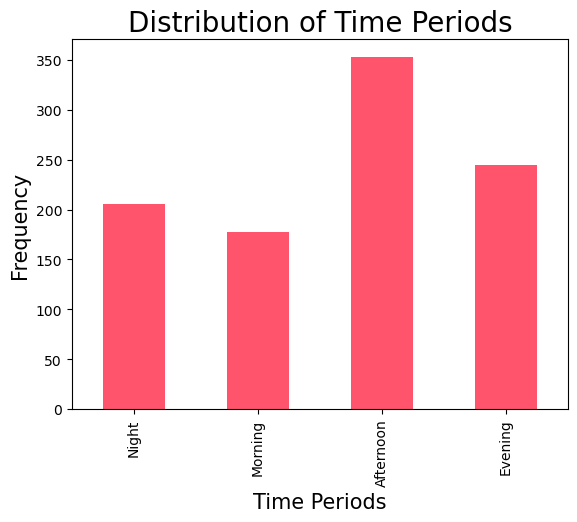

In [ ]:
import matplotlib.pyplot as plt

# Define the bins for the time periods
bins = [0, 6, 12, 18, 24]

# Define the labels for the time periods
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create a new column 'time_period' with the bin labels
df['time_period'] = pd.cut(df['time'], bins=bins, labels=labels, right=False)

# Plot the histogram with the time periods and specify the color and transparency
df['time_period'].value_counts().sort_index().plot(kind='bar', color= '#ff546c')

# Customize the plot
plt.title('Distribution of Time Periods', fontsize=20, color='black')
plt.xlabel('Time Periods', fontsize=15, color='black')
plt.ylabel('Frequency', fontsize=15, color='black')

# Display the plot
plt.show()

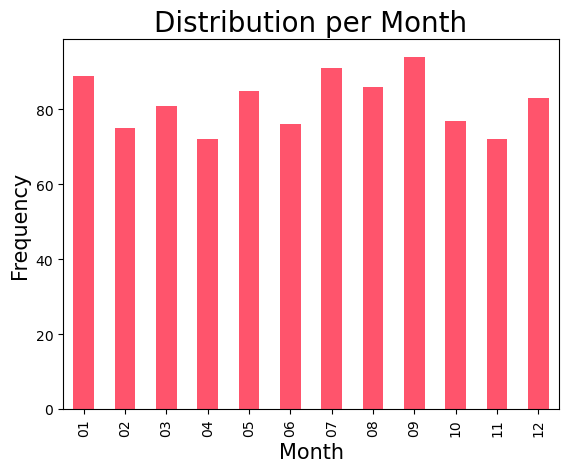

In [15]:
# Plot the histogram with the time periods
df['month'].value_counts().sort_index().plot(kind='bar', color= '#ff546c')

# Customize the plot
plt.title('Distribution per Month', fontsize=20, color='black')
plt.xlabel('Month', fontsize=15, color='black')
plt.ylabel('Frequency', fontsize=15, color='black')

# Display the plot
plt.show()

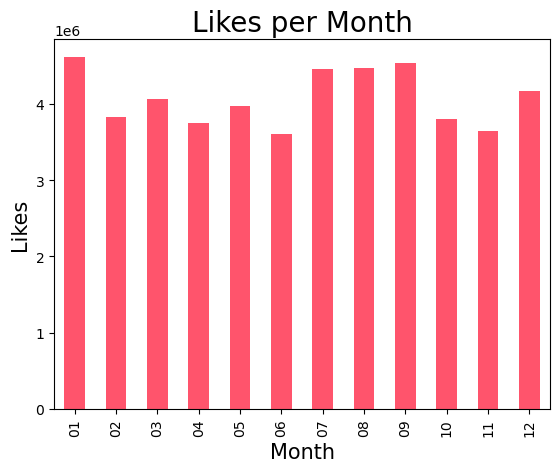

In [16]:
## By likes per month
likes_per_month = df.groupby('month')['score'].sum()

# Plotting
likes_per_month.plot(kind='bar', color='#ff546c')

# Customize the plot
plt.title('Likes per Month', fontsize=20, color='black')
plt.xlabel('Month', fontsize=15, color='black')
plt.ylabel('Likes', fontsize=15, color='black')

# Display the plot
plt.show()

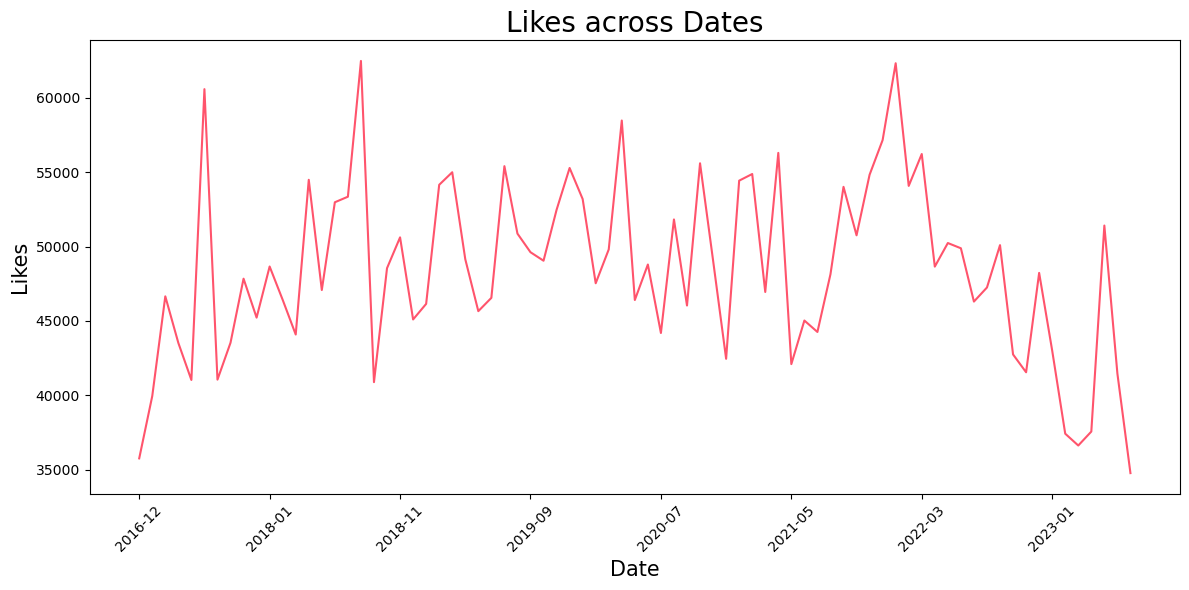

In [17]:
## By Like but for Daytime
likes_per_date = df.groupby('date')['score'].mean()

# Plotting
plt.figure(figsize=(12, 6))  # Increase figure size
likes_per_date.plot(kind='line', color='#ff546c')

# Customize the plot
plt.title('Likes across Dates', fontsize=20, color='black')
plt.xlabel('Date', fontsize=15, color='black')
plt.ylabel('Likes', fontsize=15, color='black')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Prevent labels from getting cut off

# Display the plot
plt.show()

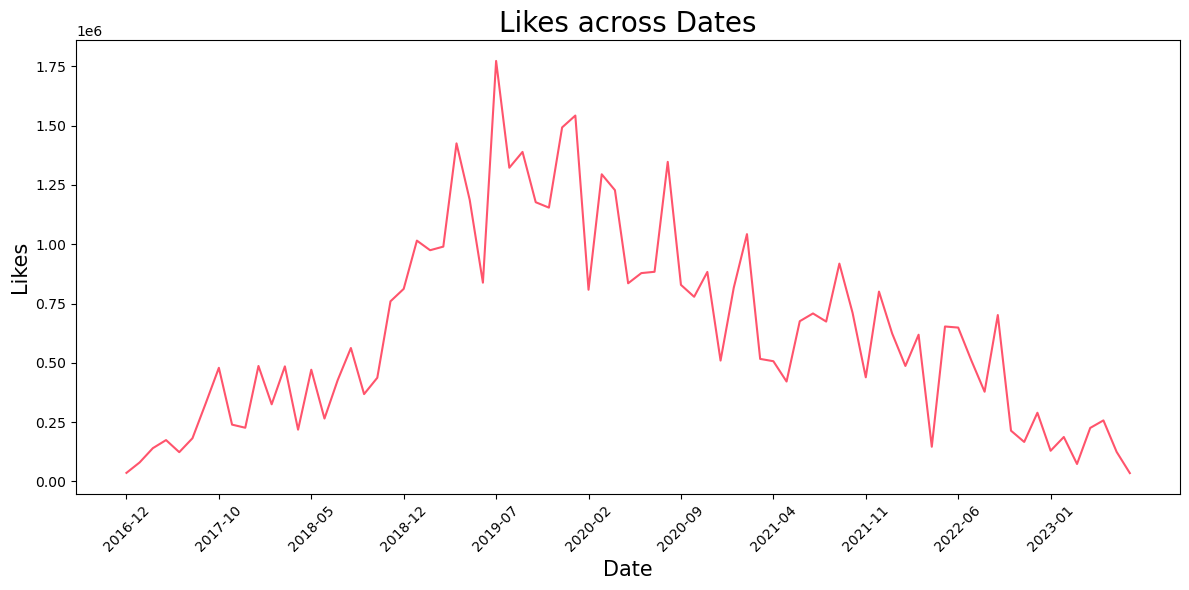

In [18]:
likes_per_date = df.groupby('date')['score'].sum()

# Plotting
plt.figure(figsize=(12, 6))  # Increase figure size
likes_per_date.plot(kind='line', color='#ff546c')

# Customize the plot
plt.title('Likes across Dates', fontsize=20, color='black')
plt.xlabel('Date', fontsize=15, color='black')
plt.ylabel('Likes', fontsize=15, color='black')

# Adjust x-axis tick locations and labels
num_ticks = 10  # Number of desired tick locations
tick_indices = list(range(0, len(likes_per_date), len(likes_per_date) // num_ticks))
tick_labels = [likes_per_date.index[i] for i in tick_indices]
plt.xticks(tick_indices, tick_labels, rotation=45)

plt.tight_layout()  # Prevent labels from getting cut off

# Display the plot
plt.show()

In [19]:
# Remove ^b
df['title'].replace(to_replace = r'^b', value = '', regex = True, inplace = True)

# Remove quotations at begining and end
df['title'] = df['title'].str.strip('"|\'')

# Remove whitespaces at begining and end
df['title'] = df['title'].str.strip()
# Remove newline characters
df['title'].replace(to_replace = r'\\n', value = ' ', regex = True, inplace = True)

# Replace UTF-8 encoding with single-quotes and ellipsis
df['title'].replace(to_replace = r'\\xe2\\x80\\x99', value = '\'',  regex = True, inplace = True)
df['title'].replace(to_replace = r'\\xe2\\x80\\xa6', value = '...', regex = True, inplace = True)

# Remove all other UTF-8 encoding
df['title'].replace(to_replace = r'\\x[0-9a-fA-F][0-9a-fA-F]', value = '', regex = True, inplace = True)

# Remove all special symbols
special_symbols = "\"|\;|\:|\!|\~|\@|\#|\$|\%|\^|\`|\&|\*|\(|\)|\_|\+|\–|\=|\{|\}|\[|\]|\.|\,"
df['title'].replace(to_replace = special_symbols, value = '', regex = True, inplace = True)

In [20]:
# Fit the variables
tfidf_vectorizer=TfidfVectorizer(stop_words=stopwords)
X_train = df.title
Y_train =  df.upvote_ratio
Xtrain=tfidf_vectorizer.fit_transform(X_train)

# Checking
Xtrain

<981x1456 sparse matrix of type '<class 'numpy.float64'>'
	with 3149 stored elements in Compressed Sparse Row format>

In [21]:
text = pd.DataFrame(Xtrain.toarray(), columns=tfidf_vectorizer.get_feature_names_out() )

In [22]:
joined_df = pd.concat([df, text], axis=1)

In [23]:
joined_df.columns

Index(['title', 'score', 'id', 'comms_num', 'upvote_ratio', 'author', 'date',
       'month', 'year', 'time',
       ...
       'yield', 'yoda', 'youâ', 'yâ', 'zac', 'zero', 'zodiac', 'zoomer', '³ï',
       '¼â'],
      dtype='object', length=1468)

In [24]:
joined_df.drop(columns={'title', 'score', 'id', 'author', 'date',
       'month', 'time','author','time_period','comms_num',   'id_count' },inplace=True)

In [25]:
y=joined_df.upvote_ratio
joined_df.drop(columns='upvote_ratio',inplace=True)

In [26]:
joined_df.isnull().sum()

year      0
10        0
100       0
11        0
12        0
         ..
zero      0
zodiac    0
zoomer    0
³ï        0
¼â        0
Length: 1454, dtype: int64

------------------------
# 🏗️ **Modeling** 🏗️

In [27]:
# Creating a model 
model=LinearRegression()

# Training the model 
model.fit(X=joined_df, y=y)

LinearRegression()

In [28]:
print('train score:', model.score(joined_df, y))

train score: 0.8991680595942092


In [29]:
model.intercept_

-1.772682062876577

In [30]:
# Get the coefficients from the linear regression object
coefficients = model.coef_

# Create a list of tuples pairing each feature name with its coefficient
feature_coeffs = pd.DataFrame(list(zip(joined_df.columns, coefficients)))
feature_coeffs.sort_values(by=1, ascending=False,inplace=True)

In [31]:
feature_coeffs.head(15)

0             1
13             25  1.055846e+11
499   girlfriendâ  4.251440e+10
8             18m  3.954344e+10
4              12  3.855962e+10
3              11  3.669565e+10
840     nightmare  3.535931e+10
2             100  3.061804e+10
17             32  2.964294e+10
1000        reach  2.954903e+10
5          120kgs  2.452847e+10
18             4â  2.447014e+10
29            abt  2.090670e+10
19             50  2.023686e+10
1008       reason  1.857876e+10
225         chloe  1.819354e+10

In [32]:
feature_coeffs.tail(15)

0             1
1292      took -1.777710e+10
786        met -2.147137e+10
1131     shots -2.267006e+10
759    married -2.300801e+10
26    absolute -2.392688e+10
1183    speech -2.528803e+10
1162     sneak -2.528803e+10
32    accident -2.673270e+10
555    heights -2.788416e+10
57     allison -2.964294e+10
320    deleted -4.041562e+10
266     convos -4.505279e+10
6         13th -5.182820e+10
1224     sugar -6.053185e+10
10          20 -8.947949e+10

-------------------
# 🤓 **Evaluation** 🤓

## Tinder Wordcloud

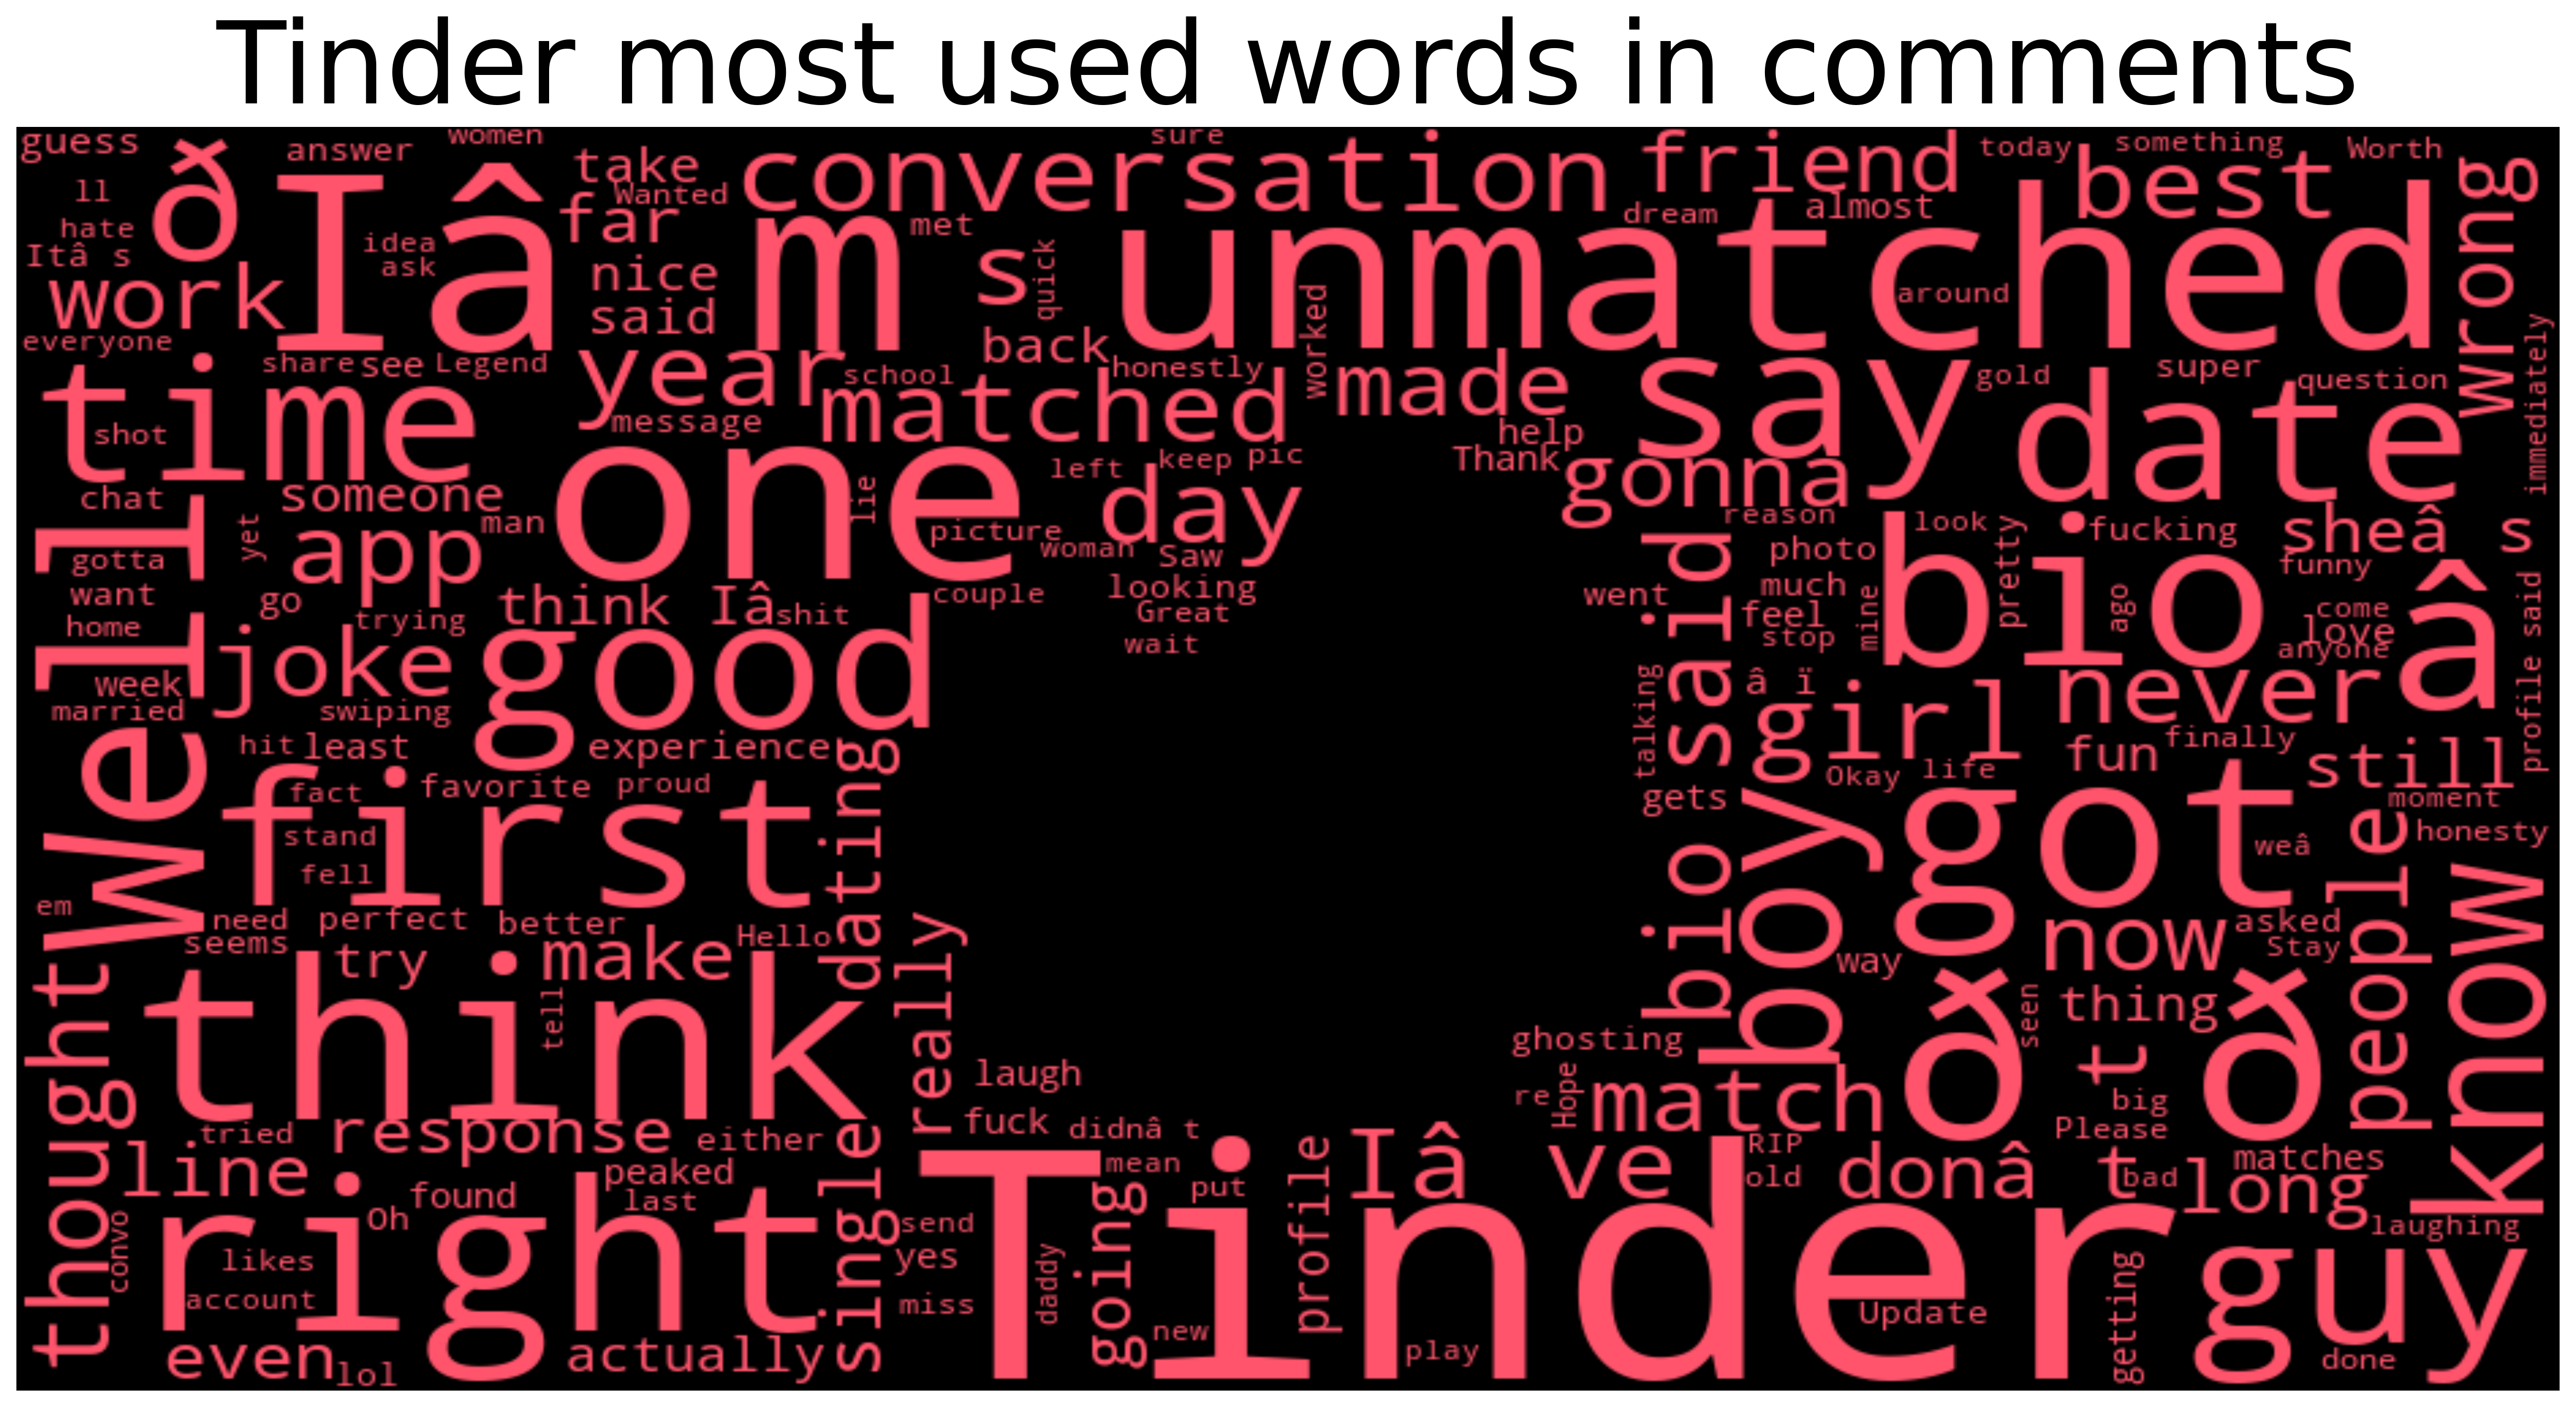

In [33]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Define the Tinder-themed word cloud parameters
tinder_color = '#ff546c'
tinder_mask = 'tinder.jpg'

# Load the mask image
mask = np.array(Image.open(tinder_mask))

# Create a WordCloud object with the desired parameters
wc = WordCloud(width=800, height=400, background_color='rgb(0,0,0)', colormap=None, mask=mask, stopwords=None)

# Generate the word cloud from the text data
wc.generate(' '.join(text for text in df.title))

# Set the color of the word cloud
wc.recolor(color_func=lambda *args, **kwargs: tinder_color)

# Set up the plot and display the word cloud
fig, ax = plt.subplots(figsize=[20, 10], dpi=300, frameon=True)
ax.imshow(wc, interpolation='bilinear', aspect='auto')
ax.axis("off")

# Add a title to the plot
plt.title("Tinder most used words in comments", fontsize=50, color='black')

# Save the plot as a PNG file
plt.savefig('wordcloud1.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [34]:
from textblob import TextBlob
# Compute the sentiment polarity of each review
df['polarity'] = df['title'].apply(lambda x: [TextBlob(word).sentiment.polarity for word in x.split()])

# Classify the sentiment as positive, negative or neutral
df['sentiment'] = df['polarity'].apply(lambda x: sum(x)/len(x) if len(x) >0 else 0 )

## Correlation Matrix

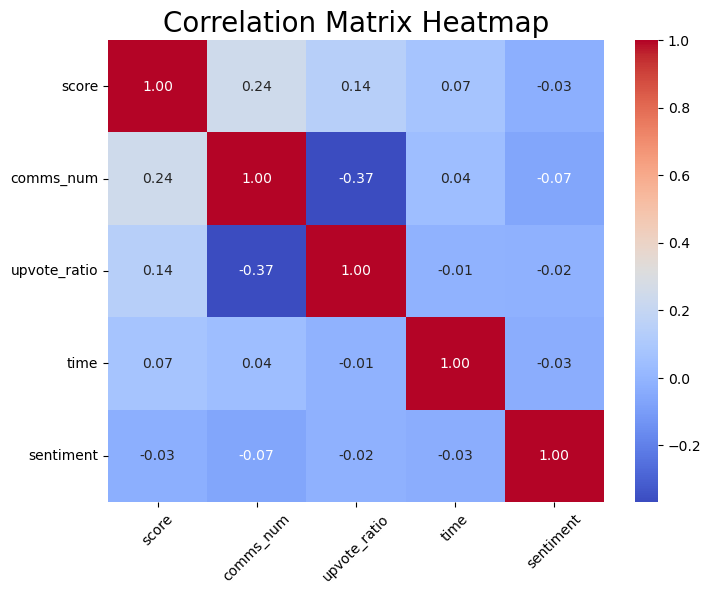

In [35]:
df_without_id_count = df.drop('id_count', axis=1)

# Calculate the correlation matrix
correlation_matrix = df_without_id_count.corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.show()

In [36]:
df_without_id_count.corrwith(df_without_id_count.sentiment)

score          -0.028461
comms_num      -0.068379
upvote_ratio   -0.017877
time           -0.031535
sentiment       1.000000
dtype: float64

In [37]:
df.head(10)

title   score      id  \
0  That's it I'm done I've actually peaked this t...  137304  95bg2p   
1                  The beard stays but you can leave  134172  lpx0pd   
2                                             Kachow  130872  g6nye4   
3  Her bio said isn't Kentucky the only state tha...  125669  ram5g2   
4  Matched with the first boy I ever kissed I was...  125168  lpb3jz   
5                                    Have some Faith  121550  a101g5   
6                                Was this too harsh?  109579  t27xz4   
7                  Kyle likes to go above and beyond  109067  x0sn28   
8                    ladies and gentleman weâre in  107730  g01n17   
9  My Tinder is a joke account where I tell peopl...  107423  epxvl5   

   comms_num  upvote_ratio            author     date month  year  time  \
0       2284          0.97       drewhead118  2018-08    08  2018    13   
1       2697          0.95  LaheyOnTheLiquor  2021-02    02  2021    19   
2       3525          0.96             Ralsp  2020-04    04  2020    14   
3       2026          0.93    IHazDemLabbitz  2021-12    12  2021     0   
4       1270          0.97       blazedddleo  2021-02    02  2021     0   
5       1140          0.96   wanderinRonin21  2018-11    11  2018    22   
6       3883          0.92     jack_sparrowe  2022-02    02  2022    21   
7       2694          0.91       sassylady88  2022-08    08  2022    16   
8        950          0.95         snkrbjorn  2020-04    04  2020    18   
9        931          0.97            Remexa  2020-01    01  2020     8   

   id_count time_period                                           polarity  \
0         1   Afternoon  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1         1     Evening                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2         1   Afternoon                                              [0.0]   
3         1       Night  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         1       Night  [0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0,...   
5         1     Evening                                    [0.0, 0.0, 0.0]   
6         1     Evening                              [0.0, 0.0, 0.0, -0.2]   
7         1   Afternoon                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
8         1     Evening                          [0.0, 0.0, 0.0, 0.0, 0.0]   
9         1     Morning  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

   sentiment  
0       0.00  
1       0.00  
2       0.00  
3       0.00  
4       0.05  
5       0.00  
6      -0.05  
7       0.00  
8       0.00  
9       0.00

# Insights

## Scores(SUM) vs Comments(SUM) of Tinder Dataset

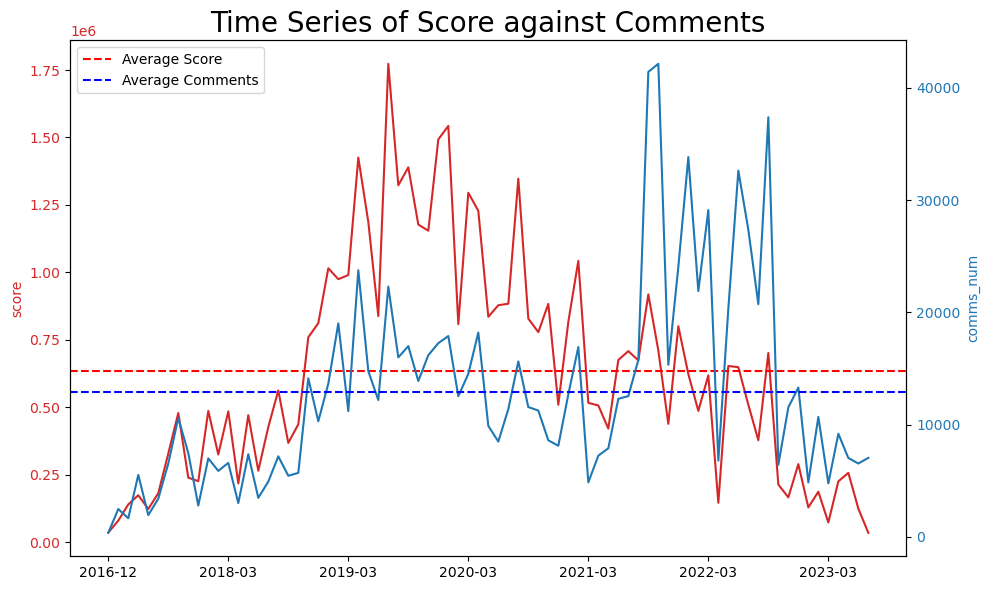

In [38]:
# Calculate the average grouped by time
df_sum = df.groupby('date').sum()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))  # Increase the figure size

# Left y-axis (score)
color = 'tab:red'
ax1.set_ylabel('score', color=color)
ax1.plot(df_sum.index, df_sum['score'], color=color)
ax1.axhline(y=df_sum['score'].mean(), linestyle='--', color='red', label='Average Score')
ax1.tick_params(axis='y', labelcolor=color)

# Right y-axis (Number of Comments)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('comms_num', color=color)
ax2.plot(df_sum.index, df_sum['comms_num'], color=color)
ax2.axhline(y=df_sum['comms_num'].mean(), linestyle='--', color='blue', label='Average Comments')
ax2.tick_params(axis='y', labelcolor=color)

# X-axis (date)
plt.xlabel('date')

# Set the desired number of tick locations and labels
num_ticks = 6
tick_indices = range(0, len(df_sum.index), len(df_sum.index) // num_ticks)
tick_labels = [df_sum.index[i] for i in tick_indices]
plt.xticks(tick_indices, tick_labels, rotation=45)

# Title
plt.title('Time Series of Score against Comments', fontsize=20)

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()

# Display the plot
plt.show()


## Ratio(AVG) vs Sentiment (AVG)

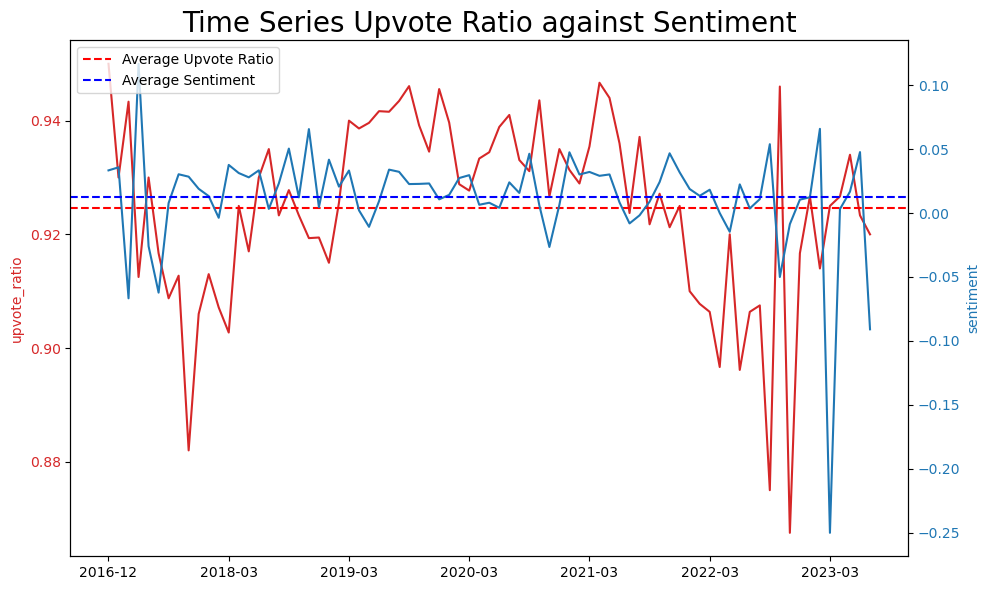

In [39]:
# Calculate the average grouped by time
df_avg = df.groupby('date').mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))  # Increase the figure size

# Left y-axis (upvote_ratio)
color = 'tab:red'
ax1.set_ylabel('upvote_ratio', color=color)
ax1.plot(df_avg.index, df_avg['upvote_ratio'], color=color)
ax1.axhline(y=df_avg['upvote_ratio'].mean(), linestyle='--', color='red', label='Average Upvote Ratio')
ax1.tick_params(axis='y', labelcolor=color)

# Right y-axis (Number of Comments)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('sentiment', color=color)
ax2.plot(df_avg.index, df_avg['sentiment'], color=color)
ax2.axhline(y=df_avg['sentiment'].mean(), linestyle='--', color='blue', label='Average Sentiment')
ax2.tick_params(axis='y', labelcolor=color)

# X-axis (date)
plt.xlabel('date')

# Set the desired number of tick locations and labels
num_ticks = 6
tick_indices = range(0, len(df_avg.index), len(df_avg.index) // num_ticks)
tick_labels = [df_avg.index[i] for i in tick_indices]
plt.xticks(tick_indices, tick_labels, rotation=45)

# Title
plt.title('Time Series Upvote Ratio against Sentiment',  fontsize=20)

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()

# Display the plot
plt.show()

# Key Takeaways



